## Twitter loading and analysis 

This notebook aims to retrieve tweets from our macro file and clean them in order to observe a correlation between Ethereum and tweets' sentiments. The following steps are executed in this notebook :

- Retrieve tweets with Twint library which was used in terminal
- Extract the wanted data (tweet's text, #followers, #likes, etc.)
- Clean the textual data (remove unnecessary elements like media, websites link, pseudos mentions)
- Compute for each tweet a sentiment score with Vader and TextBlob (named compound)


This notebook is written using Python 3.6.

In [1]:
import pandas as pd
import re
import seaborn as sns
import sys
import ast
import matplotlib.pyplot as plt
import xlrd
import openpyxl
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# macro file contains VBA code, so had to extract the relevant sheet
df = pd.read_excel('macro_test.xlsm', sheet_name = None)

In [3]:
# prints all sheets
print(df)

{'del_foreign_tweets':                           id        conversation_id               created_at  \
0      1530000000000000000.0  1530000000000000000.0  2022-05-18 16:55:34 BST   
1      1530000000000000000.0  1530000000000000000.0  2022-05-18 16:51:13 BST   
2      1530000000000000000.0  1530000000000000000.0  2022-05-18 16:31:46 BST   
3      1530000000000000000.0  1530000000000000000.0  2022-05-18 16:20:19 BST   
4      1530000000000000000.0  1480000000000000000.0  2022-05-18 16:19:29 BST   
...                      ...                    ...                      ...   
18597  1480000000000000000.0  1480000000000000000.0  2021-12-30 22:31:42 GMT   
18598                    NaN                    NaN                      NaN   
18599  1480000000000000000.0  1480000000000000000.0  2021-12-30 21:50:13 GMT   
18600                    NaN                    NaN                      NaN   
18601  1480000000000000000.0  1480000000000000000.0  2021-12-30 21:05:02 GMT   

                

In [4]:
# prints all sheets name in an ordered dictionary
print(df.keys())

dict_keys(['del_foreign_tweets', 'extract_relevant'])


In [5]:
# print second sheet name
final_sheet = list(df.keys())[1]
print(final_sheet)

extract_relevant


In [6]:
# print "extract_relevant" sheet
print(df[final_sheet])

                    created_at  \
0      2022-05-18 16:55:34 BST   
1      2022-05-18 16:31:46 BST   
2      2022-05-18 16:20:19 BST   
3      2022-05-18 16:16:58 BST   
4      2022-05-18 16:15:33 BST   
...                        ...   
10612  2021-12-30 23:00:05 GMT   
10613  2021-12-30 22:56:15 GMT   
10614  2021-12-30 22:50:55 GMT   
10615  2021-12-30 22:31:42 GMT   
10616  2021-12-30 21:50:13 GMT   

                                                   tweet  
0      @WTarbiat ethereum pos has been soon for four ...  
1      Ethereum's main testnet set for proof-of-stake...  
2      Cloudflare announced its support for the devel...  
3      üèéüí®VROOM VROOM Welcome @DevlinDeFran to t...  
4      Robinhood will launch a non-custodial #Ethereu...  
...                                                  ...  
10612  #BagSeason is the perfect time to #GiveBigTXCr...  
10613  @AndyRusseII Sorry can‚Äôt hear you too busy l...  
10614  Listen to JB talk Ethereum like I‚Äôm doing ri...  
1

In [7]:
# export "extract_relevant" sheet to file
#df[final_sheet].to_csv('Tw_final.csv', index = False)

## Loading dataset

We used the *Twint* package to scrape the tweets: 
https://github.com/twintproject/twint

I used its queries to only filter verified tweets of users and for data protection purposes user names were removed before pre processing

The Twint package must be installed using the *pip install twint* from the command line

It helped us avoid most API limitiations of Twitter and allows you to access tweets without authentication 

In [8]:
Pre_df = pd.read_csv('Tw_final.csv', index_col = None)
Pre_df.head(5)

,created_at,tweet
0,2022-05-18 16:55:34 BST,@WTarbiat ethereum pos has been soon for four ...
1,2022-05-18 16:31:46 BST,Ethereum's main testnet set for proof-of-stake...
2,2022-05-18 16:20:19 BST,Cloudflare announced its support for the devel...
3,2022-05-18 16:16:58 BST,üèéüí®VROOM VROOM Welcome @DevlinDeFran to t...
4,2022-05-18 16:15:33 BST,Robinhood will launch a non-custodial #Ethereu...


In [9]:
print(Pre_df['tweet'])

0        @WTarbiat ethereum pos has been soon for four ...
1        Ethereum's main testnet set for proof-of-stake...
2        Cloudflare announced its support for the devel...
3        üèéüí®VROOM VROOM Welcome @DevlinDeFran to t...
4        Robinhood will launch a non-custodial #Ethereu...
                               ...                        
10612    #BagSeason is the perfect time to #GiveBigTXCr...
10613    @AndyRusseII Sorry can‚Äôt hear you too busy l...
10614    Listen to JB talk Ethereum like I‚Äôm doing ri...
10615    Before the year of 2021 comes to an end let‚Äô...
10616                       The Ethereum you know and love
Name: tweet, Length: 10617, dtype: object


## Pre-processing dataframe 

In [10]:
#Drop unnamed columns by filtering the dataframe using str.match.It can be also known as continual filtering.
Pre_df.drop(Pre_df.columns[Pre_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
Pre_df

,created_at,tweet
0,2022-05-18 16:55:34 BST,@WTarbiat ethereum pos has been soon for four ...
1,2022-05-18 16:31:46 BST,Ethereum's main testnet set for proof-of-stake...
2,2022-05-18 16:20:19 BST,Cloudflare announced its support for the devel...
3,2022-05-18 16:16:58 BST,üèéüí®VROOM VROOM Welcome @DevlinDeFran to t...
4,2022-05-18 16:15:33 BST,Robinhood will launch a non-custodial #Ethereu...
...,...,...
10612,2021-12-30 23:00:05 GMT,#BagSeason is the perfect time to #GiveBigTXCr...
10613,2021-12-30 22:56:15 GMT,@AndyRusseII Sorry can‚Äôt hear you too busy l...
10614,2021-12-30 22:50:55 GMT,Listen to JB talk Ethereum like I‚Äôm doing ri...
10615,2021-12-30 22:31:42 GMT,Before the year of 2021 comes to an end let‚Äô...


Here we queried the Twint package to get the latest tweets about ethereum. Then we transformed it to store only the useful data inside a Pandas dataframe 

The following fields are retrieved from the response:

- **tweet** (string) : UTF-8 textual content of the tweet, max 140 chars
- **created_at** (datetime) : creation date and time of the tweet


The pandas package must be installed using *pip install pandas* from the command line.

In [11]:
 # Lets check there's no missing tweets in the dataframe
Pre_df['tweet'].isna().sum()

0

In [12]:
# Lets check there's no missing dates/time in the dataframe
Pre_df['created_at'].isna().sum()

0

We will now clean the data

We already filtered the tweets using VBA. We will now remove elements that are not neccessary for analysis, @Pseudo, unhashtag #happy -> happy, links.

We won't transform to lower case or remove puncuations because Vader takes into consideration to emphasize sentiments.

### Remove hashtags

In [13]:
post_df = Pre_df
post_df

,created_at,tweet
0,2022-05-18 16:55:34 BST,@WTarbiat ethereum pos has been soon for four ...
1,2022-05-18 16:31:46 BST,Ethereum's main testnet set for proof-of-stake...
2,2022-05-18 16:20:19 BST,Cloudflare announced its support for the devel...
3,2022-05-18 16:16:58 BST,üèéüí®VROOM VROOM Welcome @DevlinDeFran to t...
4,2022-05-18 16:15:33 BST,Robinhood will launch a non-custodial #Ethereu...
...,...,...
10612,2021-12-30 23:00:05 GMT,#BagSeason is the perfect time to #GiveBigTXCr...
10613,2021-12-30 22:56:15 GMT,@AndyRusseII Sorry can‚Äôt hear you too busy l...
10614,2021-12-30 22:50:55 GMT,Listen to JB talk Ethereum like I‚Äôm doing ri...
10615,2021-12-30 22:31:42 GMT,Before the year of 2021 comes to an end let‚Äô...


In [14]:
# If we copy and paste bracket below it would remove the hashtags entirely
# [A-Za-z0-9_]

In [15]:
post_df["clean_tweet"] = post_df["tweet"].apply(lambda s: ' '.join(re.sub("#+","", s).split()))
print(post_df["clean_tweet"].iloc[4])

Robinhood will launch a non-custodial Ethereum wallet with DeFi and NFT capabilities. When will it release? Let's find out!üëá https://t.co/rOXipnyfML


In [16]:
print(post_df['clean_tweet'].iloc[17]) #another test

Have you Registered for AWIT's The Blockchain Conference (Jul 6-8). ___________________________________________ The countdown trickling fast! Register @ https://t.co/gIAupJ98ZK Defi Metaverse bitcoin ethereum Africa Cryptocurrency https://t.co/0aMy4Ef4uF


### Remove mentions

In [17]:
post_df["clean_tweet"] = post_df["clean_tweet"].apply(lambda s: ' '.join(re.sub("@[A-Za-z0-9_]+","", s).split()))
print(post_df["clean_tweet"].iloc[10613])

Sorry can‚Äôt hear you too busy looking at my ethereum üìàüìàüìà blockchain NFTCommunity CryptocurrencyNews Bitcoin


### Remove links

In [18]:
post_df["clean_tweet"] = post_df["clean_tweet"].apply(lambda s: ' '.join(re.sub(r'https?:\/\/\S+', '', s).split()))
print(post_df['clean_tweet'].iloc[1])

Ethereum's main testnet set for proof-of-stake merge in early June By


### Remove weird characters due to encoding of CSV

In [19]:
def removeFunny(string):
     return string.encode('ascii', 'ignore').decode()
post_df["clean_tweet"] = post_df["clean_tweet"].apply(lambda s: removeFunny(s))
print(post_df['clean_tweet'].iloc[10613])

Sorry cant hear you too busy looking at my ethereum  blockchain NFTCommunity CryptocurrencyNews Bitcoin


In [20]:
print(post_df['clean_tweet'].iloc[10521])

Eminem Buys Bored Ape Yacht Club Ethereum NFT for $450K tech culture hiphop


### Converting 'created_at' column to same timezone

We need to convert all timestamps of the tweets to NY EST tz

In [21]:
import pytz
import dateutil
import datetime

def gen_tzinfos():
    #Function to get all the names of timezones like BST, EST etc. To avoid manually having to map BST to utc+1 etc 
    
    for zone in pytz.common_timezones:
        try:
            tzdate = pytz.timezone(zone).localize(datetime.datetime.utcnow(), is_dst=None)
        except pytz.NonExistentTimeError:
            pass
        else:
            tzinfo = dateutil.tz.gettz(zone)

            if tzinfo:
                yield tzdate.tzname(), tzinfo

TZINFOS = dict(gen_tzinfos()) #Makes a dict of all timezones, named and numbers mapped to their timezone

post_df['created_at'] = [dateutil.parser.parse(x, tzinfos=TZINFOS) for x in post_df['created_at']] #Convert to a datatype with proper timezone
post_df['created_at']

0        2022-05-18 16:55:34+01:00
1        2022-05-18 16:31:46+01:00
2        2022-05-18 16:20:19+01:00
3        2022-05-18 16:16:58+01:00
4        2022-05-18 16:15:33+01:00
                   ...            
10612    2021-12-30 23:00:05+00:00
10613    2021-12-30 22:56:15+00:00
10614    2021-12-30 22:50:55+00:00
10615    2021-12-30 22:31:42+00:00
10616    2021-12-30 21:50:13+00:00
Name: created_at, Length: 10617, dtype: object

In [22]:
post_df['created_at']=pd.to_datetime(post_df['created_at'], format='%Y-%m-%d %H:%M:%S%z', utc=True) #Convert to pandas and utc
post_df['created_at']=post_df['created_at'].dt.tz_convert(pytz.timezone('US/Eastern')) #Convert to us/eastern
post_df['created_at'] #Please note that its taking in account if its summer or winter time, so it will shift between -05 and -04

0       2022-05-18 11:55:34-04:00
1       2022-05-18 11:31:46-04:00
2       2022-05-18 11:20:19-04:00
3       2022-05-18 11:16:58-04:00
4       2022-05-18 11:15:33-04:00
                   ...           
10612   2021-12-30 18:00:05-05:00
10613   2021-12-30 17:56:15-05:00
10614   2021-12-30 17:50:55-05:00
10615   2021-12-30 17:31:42-05:00
10616   2021-12-30 16:50:13-05:00
Name: created_at, Length: 10617, dtype: datetime64[ns, US/Eastern]

In [23]:
post_df['created_at']= post_df['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S EST') #Make it back to the same format as the input
post_df['created_at']

0        2022-05-18 11:55:34 EST
1        2022-05-18 11:31:46 EST
2        2022-05-18 11:20:19 EST
3        2022-05-18 11:16:58 EST
4        2022-05-18 11:15:33 EST
                  ...           
10612    2021-12-30 18:00:05 EST
10613    2021-12-30 17:56:15 EST
10614    2021-12-30 17:50:55 EST
10615    2021-12-30 17:31:42 EST
10616    2021-12-30 16:50:13 EST
Name: created_at, Length: 10617, dtype: object

In [24]:
clean_df = post_df[['created_at','tweet','clean_tweet']]
clean_df

,created_at,tweet,clean_tweet
0,2022-05-18 11:55:34 EST,@WTarbiat ethereum pos has been soon for four ...,ethereum pos has been soon for four years
1,2022-05-18 11:31:46 EST,Ethereum's main testnet set for proof-of-stake...,Ethereum's main testnet set for proof-of-stake...
2,2022-05-18 11:20:19 EST,Cloudflare announced its support for the devel...,Cloudflare announced its support for the devel...
3,2022-05-18 11:16:58 EST,üèéüí®VROOM VROOM Welcome @DevlinDeFran to t...,VROOM VROOM Welcome to the Bitbuy team Devlin ...
4,2022-05-18 11:15:33 EST,Robinhood will launch a non-custodial #Ethereu...,Robinhood will launch a non-custodial Ethereum...
...,...,...,...
10612,2021-12-30 18:00:05 EST,#BagSeason is the perfect time to #GiveBigTXCr...,BagSeason is the perfect time to GiveBigTXCryp...
10613,2021-12-30 17:56:15 EST,@AndyRusseII Sorry can‚Äôt hear you too busy l...,Sorry cant hear you too busy looking at my eth...
10614,2021-12-30 17:50:55 EST,Listen to JB talk Ethereum like I‚Äôm doing ri...,Listen to JB talk Ethereum like Im doing right...
10615,2021-12-30 17:31:42 EST,Before the year of 2021 comes to an end let‚Äô...,Before the year of 2021 comes to an end lets t...


In [25]:
clean_df.isna().sum()

created_at     0
tweet          0
clean_tweet    0
dtype: int64

## Sentiment analysis with Vader

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

VADER takes into account:

- negations and contractions (not good, wasn’t good)
- Punctuation (good!!!), CAPS, emotes :), emojis
- Intensificators (very, kind of), acronyms ‘lol’
- Scores between -1.0 (negative) and 1.0 (positive)

The VADER package must be installed using *pip install vaderSentiment* from the command line.

In [26]:
import seaborn as sns
import numpy as np
import os
import sys
import ast
from wordcloud import WordCloud, STOPWORDS
plt.style.use('fivethirtyeight')
#Function for getting the sentiment 
cp = sns.color_palette()


In [27]:
# Generating sentiment for all the tweets present in the dataset
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

emptyline=[]
for row in clean_df['clean_tweet']:
    
    vs = analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating a new dataframe with sentiments
df_sentiments = pd.DataFrame(emptyline)
df_sentiments.head(20)

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,1.000,0.000,0.0000
2,0.000,0.904,0.096,0.3472
3,0.000,0.875,0.125,0.4588
4,0.000,1.000,0.000,0.0000
5,0.000,0.827,0.173,0.5574
6,0.188,0.812,0.000,-0.5267
7,0.000,1.000,0.000,0.0000
8,0.242,0.549,0.209,-0.0772
9,0.000,1.000,0.000,0.0000


In [28]:
# Merging the sentiments back to clean dataframe 
df_merged = pd.concat([clean_df, df_sentiments], axis = 1)
df_merged

,created_at,tweet,clean_tweet,neg,neu,pos,compound
0,2022-05-18 11:55:34 EST,@WTarbiat ethereum pos has been soon for four ...,ethereum pos has been soon for four years,0.000,1.000,0.000,0.0000
1,2022-05-18 11:31:46 EST,Ethereum's main testnet set for proof-of-stake...,Ethereum's main testnet set for proof-of-stake...,0.000,1.000,0.000,0.0000
2,2022-05-18 11:20:19 EST,Cloudflare announced its support for the devel...,Cloudflare announced its support for the devel...,0.000,0.904,0.096,0.3472
3,2022-05-18 11:16:58 EST,üèéüí®VROOM VROOM Welcome @DevlinDeFran to t...,VROOM VROOM Welcome to the Bitbuy team Devlin ...,0.000,0.875,0.125,0.4588
4,2022-05-18 11:15:33 EST,Robinhood will launch a non-custodial #Ethereu...,Robinhood will launch a non-custodial Ethereum...,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...
10612,2021-12-30 18:00:05 EST,#BagSeason is the perfect time to #GiveBigTXCr...,BagSeason is the perfect time to GiveBigTXCryp...,0.000,0.601,0.399,0.9122
10613,2021-12-30 17:56:15 EST,@AndyRusseII Sorry can‚Äôt hear you too busy l...,Sorry cant hear you too busy looking at my eth...,0.091,0.909,0.000,-0.0772
10614,2021-12-30 17:50:55 EST,Listen to JB talk Ethereum like I‚Äôm doing ri...,Listen to JB talk Ethereum like Im doing right...,0.000,0.783,0.217,0.3612
10615,2021-12-30 17:31:42 EST,Before the year of 2021 comes to an end let‚Äô...,Before the year of 2021 comes to an end lets t...,0.000,1.000,0.000,0.0000


In [29]:
# Create a function to label the compound scores 
def sentiment(label):
    if label < 0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    elif label > 0:
        return "Positive"

In [30]:
df_merged['sentiment'] = df_merged['compound'].apply(sentiment)
df_merged.head(30)

,created_at,tweet,clean_tweet,neg,neu,pos,compound,sentiment
0,2022-05-18 11:55:34 EST,@WTarbiat ethereum pos has been soon for four ...,ethereum pos has been soon for four years,0.000,1.000,0.000,0.0000,Neutral
1,2022-05-18 11:31:46 EST,Ethereum's main testnet set for proof-of-stake...,Ethereum's main testnet set for proof-of-stake...,0.000,1.000,0.000,0.0000,Neutral
2,2022-05-18 11:20:19 EST,Cloudflare announced its support for the devel...,Cloudflare announced its support for the devel...,0.000,0.904,0.096,0.3472,Positive
3,2022-05-18 11:16:58 EST,üèéüí®VROOM VROOM Welcome @DevlinDeFran to t...,VROOM VROOM Welcome to the Bitbuy team Devlin ...,0.000,0.875,0.125,0.4588,Positive
4,2022-05-18 11:15:33 EST,Robinhood will launch a non-custodial #Ethereu...,Robinhood will launch a non-custodial Ethereum...,0.000,1.000,0.000,0.0000,Neutral
5,2022-05-18 11:15:00 EST,Cybersecurity firm Cloudflare is set to launch...,Cybersecurity firm Cloudflare is set to launch...,0.000,0.827,0.173,0.5574,Positive
6,2022-05-18 11:02:20 EST,Ethereum leads the industry in block space dem...,Ethereum leads the industry in block space dem...,0.188,0.812,0.000,-0.5267,Negative
7,2022-05-18 11:01:03 EST,Weekly #NFT sales plunge 64% to $505 million a...,Weekly NFT sales plunge 64% to $505 million am...,0.000,1.000,0.000,0.0000,Neutral
8,2022-05-18 10:50:46 EST,@simplykashif Hmm surprised to see Ethereum ra...,Hmm surprised to see Ethereum ranked lower.,0.242,0.549,0.209,-0.0772,Negative
9,2022-05-18 10:47:54 EST,Here are six leading platforms ranked by daily...,Here are six leading platforms ranked by daily...,0.000,1.000,0.000,0.0000,Neutral


In [32]:
# made a condition that if the "clean_tweet" column is equal to a blank then remove the row
df_merged = df_merged[df_merged["clean_tweet"] != ""]

In [33]:
df_merged.shape

(10615, 8)

In [34]:
df_merged.isna().sum()

created_at     0
tweet          0
clean_tweet    0
neg            0
neu            0
pos            0
compound       0
sentiment      0
dtype: int64

In [35]:
# Export to csv for correlation analysis-extract relevant columns 
# df_merged.to_csv('tweets_sentiment.csv', index = False, columns = ['created_at','clean_tweet','compound'])

## Data Exploration VADER

#### Sentiment count

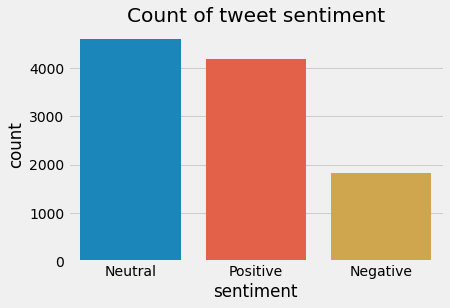

In [36]:
# plotting count plot with sentiment column
sns.countplot(x = 'sentiment', data = df_merged)
plt.title('Count of tweet sentiment')

# display
plt.show()

From this, we can see that Neutral and Postive sentiments dominate the dataset. The reason why we may have more neutral tweets is because majority of the tweets are ambiguous. Unfortunatley, this is out of our control

Text(0.5, 1.0, 'Distribution of Sentiments')

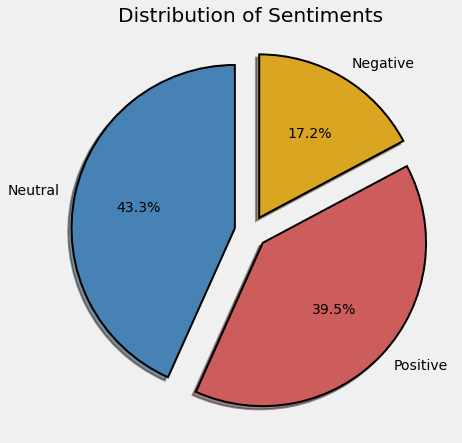

In [37]:
fig = plt.figure(figsize=(7,7))
colors = ("steelblue", "indianred" , "goldenrod") # Order is: Neu, Pos, Neg
wp = {'linewidth': 2, 'edgecolor': 'black'}
tags = df_merged['sentiment'].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind = 'pie', autopct = '%1.1f%%' , shadow = True, colors = colors,
         startangle = 90, wedgeprops = wp , explode = explode, label = '')
plt.title('Distribution of Sentiments')

In [38]:
pos_tweets = df_merged[df_merged.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['compound'], ascending = False)
pos_tweets.head()

,created_at,tweet,clean_tweet,neg,neu,pos,compound,sentiment
9407,2022-01-18 03:27:45 EST,üö® HUGE GIVEAWAY! üö® I AM GIVING AWAY $100...,HUGE GIVEAWAY! I AM GIVING AWAY $1000 WORTH ...,0.0,0.469,0.531,0.9801,Positive
10202,2022-01-06 12:10:05 EST,Giving away a free Hexed NFT from the original...,Giving away a free Hexed NFT from the original...,0.0,0.531,0.469,0.9801,Positive
734,2022-05-09 17:06:31 EST,The Bonus @voltnobi Giveaway Special Thank you...,The Bonus Giveaway Special Thank you for the S...,0.0,0.521,0.479,0.9744,Positive
6723,2022-02-22 15:23:24 EST,@GatesOfETH Congratulations to @johblin29 @71p...,Congratulations to You three have won a whitel...,0.0,0.482,0.518,0.9701,Positive
4861,2022-03-17 14:11:47 EST,‚òòÔ∏èHappy St. Patricks Day!‚òòÔ∏è Feeling li...,Happy St. Patricks Day! Feeling like you've go...,0.0,0.602,0.398,0.9661,Positive


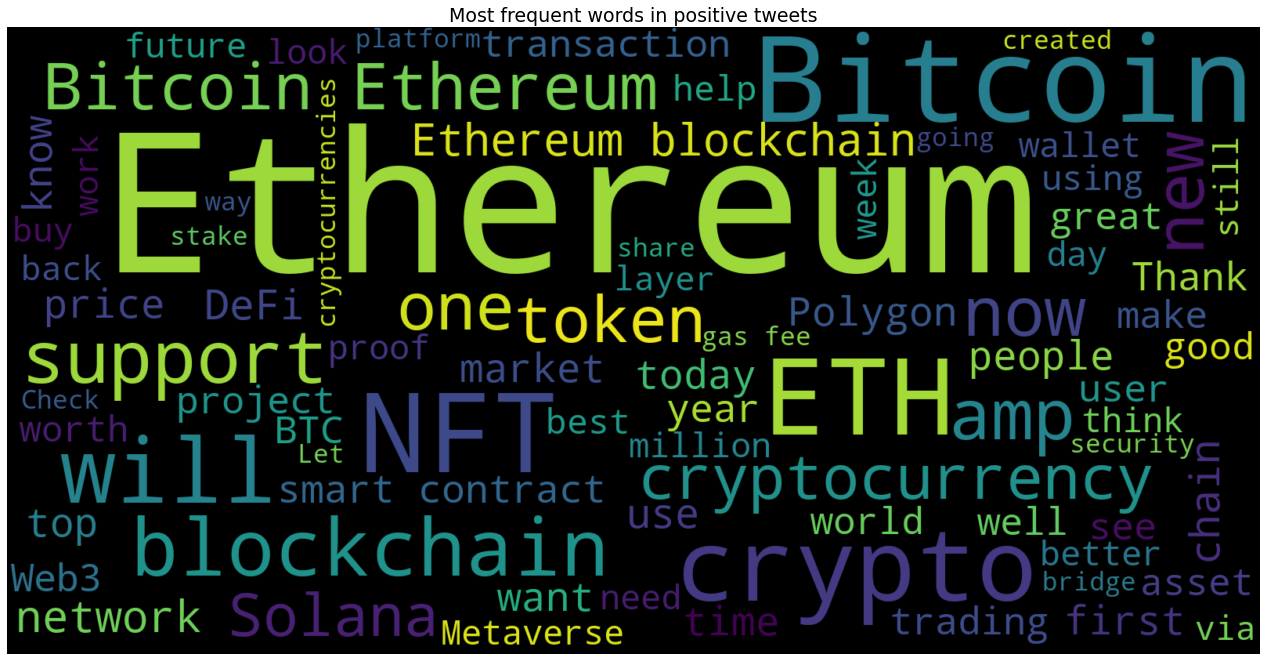

In [39]:
tweet = ' '.join([word for word in pos_tweets['clean_tweet']])
plt.figure(figsize=(20,15), facecolor = 'None')
wordcloud = WordCloud(max_words = 80, width = 1600, height = 800).generate(tweet)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize = 19)
plt.show()

In [40]:
neg_tweets = df_merged[df_merged.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['compound'], ascending = False)
neg_tweets.head()

,created_at,tweet,clean_tweet,neg,neu,pos,compound,sentiment
1542,2022-05-01 00:18:01 EST,If it‚Äôs one thing I learned today about the ...,If its one thing I learned today about the Oth...,0.074,0.872,0.053,-0.0002,Negative
2965,2022-04-12 14:10:59 EST,@EleanorMorton Pst: probably not a good idea t...,Pst: probably not a good idea to engage with t...,0.163,0.675,0.162,-0.0015,Negative
10262,2022-01-05 16:19:54 EST,The crazy part: Due to my extremely well diver...,The crazy part: Due to my extremely well diver...,0.101,0.799,0.101,-0.0018,Negative
6881,2022-02-20 05:01:16 EST,Yeah that‚Äôs what I‚Äôm trying to find out re...,Yeah thats what Im trying to find out respectf...,0.112,0.776,0.112,-0.0026,Negative
2457,2022-04-19 12:43:45 EST,@EricBalchunas @BTC_Archive Not a spot ETF. No...,Not a spot ETF. Not physically backed. But a l...,0.037,0.963,0.000,-0.0096,Negative


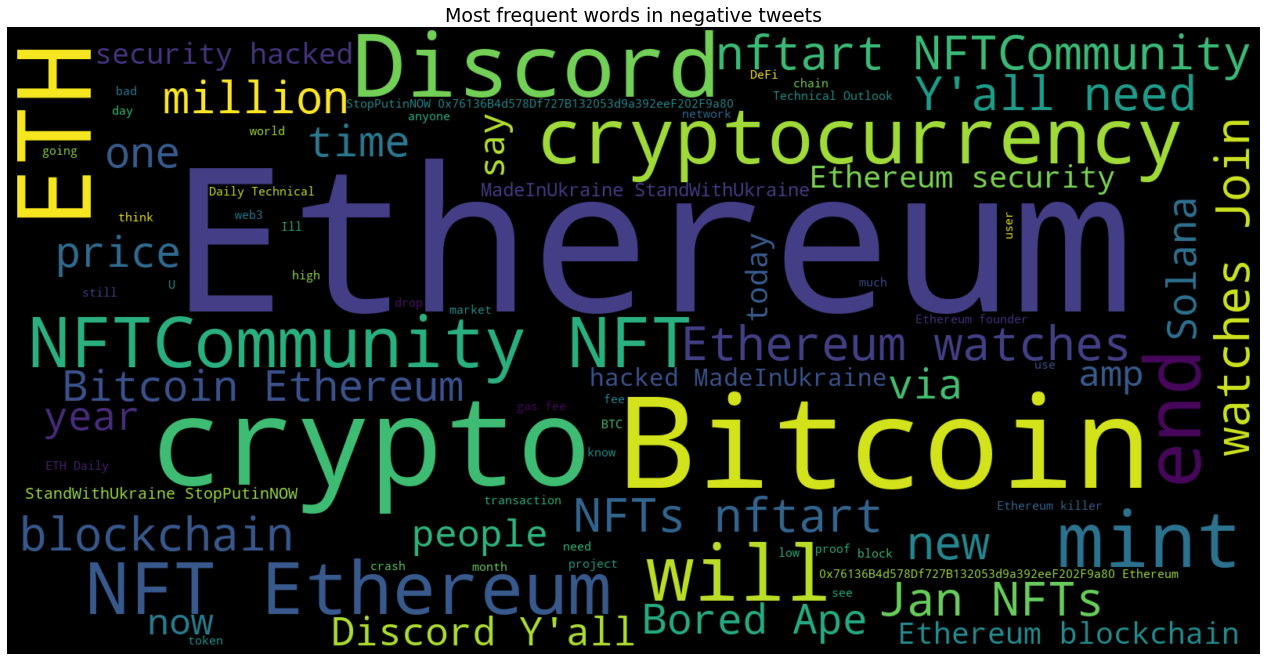

In [41]:
tweet = ' '.join([word for word in neg_tweets['clean_tweet']])
plt.figure(figsize=(20,15), facecolor = 'None')
wordcloud = WordCloud(max_words = 80, width = 1600, height = 800).generate(tweet)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize = 19)
plt.show()

## TextBlob

In [42]:
from textblob import TextBlob

### Removing emojis 

We're removing the emojis for Textblob model as it doesn't take it into account

In [43]:
# Create a separate df for TextBlob so that we can compute scores
df_TextBlob_test = clean_df
df_TextBlob_test

,created_at,tweet,clean_tweet
0,2022-05-18 11:55:34 EST,@WTarbiat ethereum pos has been soon for four ...,ethereum pos has been soon for four years
1,2022-05-18 11:31:46 EST,Ethereum's main testnet set for proof-of-stake...,Ethereum's main testnet set for proof-of-stake...
2,2022-05-18 11:20:19 EST,Cloudflare announced its support for the devel...,Cloudflare announced its support for the devel...
3,2022-05-18 11:16:58 EST,üèéüí®VROOM VROOM Welcome @DevlinDeFran to t...,VROOM VROOM Welcome to the Bitbuy team Devlin ...
4,2022-05-18 11:15:33 EST,Robinhood will launch a non-custodial #Ethereu...,Robinhood will launch a non-custodial Ethereum...
...,...,...,...
10612,2021-12-30 18:00:05 EST,#BagSeason is the perfect time to #GiveBigTXCr...,BagSeason is the perfect time to GiveBigTXCryp...
10613,2021-12-30 17:56:15 EST,@AndyRusseII Sorry can‚Äôt hear you too busy l...,Sorry cant hear you too busy looking at my eth...
10614,2021-12-30 17:50:55 EST,Listen to JB talk Ethereum like I‚Äôm doing ri...,Listen to JB talk Ethereum like Im doing right...
10615,2021-12-30 17:31:42 EST,Before the year of 2021 comes to an end let‚Äô...,Before the year of 2021 comes to an end lets t...


In [44]:
# The emojis are removed since they can’t be analyzed. 
# The apply function takes the deEmojify function,which is applied to every row of the data frame. 
# In the function, we first encode the string using the ASCII encoding, 
# and then we decode it. In this way, we are able to delete the emojis.
def deEmojify(inputString):
     return inputString.encode('ascii', 'ignore').decode('ascii')
df_TextBlob_test["clean_tweet"] = df_TextBlob_test["clean_tweet"].apply(lambda s: deEmojify(s))
print(df_TextBlob_test['clean_tweet'].iloc[7084])

These Ethereum NFTs on NFT are lookin good  Trade your ETH NFTs on NFT and enjoy:  No extra listing fees  No gas fees  Full service fee rebate till 30 June 2022 Learn more:


### Compute polarity

In [45]:
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [46]:
df_TextBlob_test['polarity'] = df_TextBlob_test['clean_tweet'].apply(polarity)

In [47]:
df_TextBlob_test = df_TextBlob_test[df_TextBlob_test["clean_tweet"] != ""]

In [48]:
df_TextBlob_test.shape

(10615, 4)

In [49]:
# Export to csv for correlation analysis -> extract relevant columns 
# df_TextBlob_test.to_csv('tweets_sentiment_textblob.csv', index = False, columns = ['created_at','clean_tweet','polarity'])